# WeatherPy
----

### Analysis
* The concentration of cities there were nearer to the equator had warmer temperatures. Since it is just only turning fall in the northern hemisphere, the temperatures were slightly warmer going north from the equator.
* A good amount of higher wind speeds are recorder more north of the equator. 
* Cloudiness and latitude have no strong relationship with each other.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

10df7e3213858dd1ee50e54fed4bbb15


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
thislist=[]
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q="
print("Start API calls ---")
for city in cities:
    pushcity={}
    # Get weather data
    response = requests.get(query_url+city+"&units=metric").json()
    if response['cod']==200:
        print('Fetching Information | ' + city)
        pushcity= {
            'City': response['name'],
            'Cloudiness': response['clouds']['all'],
            'Country': response['sys']['country'],
            'Date': response['dt'],
            'Humidity': response['main']['humidity'],
            'Lat': response['coord']['lat'],
            'Lng': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Wind Speed': response['wind']['speed']
        }
        thislist.append(pushcity)
        time.sleep(2)
    else:
        print('City - '+ city + ' - not found. Skipping...')
    
    

Start API calls ---
Fetching Information | berlevag
Fetching Information | cape town
Fetching Information | barcelos
Fetching Information | ushuaia
Fetching Information | port alfred
Fetching Information | nacala
Fetching Information | hilo
Fetching Information | vaini
Fetching Information | grants
Fetching Information | saldanha
Fetching Information | chuy
Fetching Information | arman
Fetching Information | kutum
City - amderma - not found. Skipping...
Fetching Information | lavrentiya
Fetching Information | mataura
Fetching Information | saint george
Fetching Information | iqaluit
Fetching Information | itoman
Fetching Information | benghazi
Fetching Information | carnarvon
Fetching Information | labuhan
Fetching Information | macas
Fetching Information | hasaki
Fetching Information | taoudenni
Fetching Information | faanui
Fetching Information | cabra
Fetching Information | bethel
Fetching Information | aklavik
Fetching Information | tazmalt
Fetching Information | pedernales
Fetchin

Fetching Information | killybegs
Fetching Information | buckeye
Fetching Information | sibolga
Fetching Information | tual
Fetching Information | barao de melgaco
Fetching Information | hamilton
Fetching Information | marsabit
Fetching Information | wamba
Fetching Information | palmer
Fetching Information | santona
Fetching Information | ribeira grande
Fetching Information | komsomolskiy
Fetching Information | dingle
City - bentiu - not found. Skipping...
Fetching Information | plouzane
Fetching Information | chicama
Fetching Information | luba
Fetching Information | khatanga
City - daosa - not found. Skipping...
Fetching Information | north myrtle beach
Fetching Information | vallenar
Fetching Information | rio gallegos
Fetching Information | puerto madryn
Fetching Information | margate
Fetching Information | zhuanghe
Fetching Information | kurumkan
Fetching Information | adrar
Fetching Information | olinda
Fetching Information | gornopravdinsk
Fetching Information | kavieng
Fetching 

Fetching Information | quinto di treviso
Fetching Information | gimli
City - tuggurt - not found. Skipping...
Fetching Information | omboue
Fetching Information | juba
City - korla - not found. Skipping...
Fetching Information | ko samui
Fetching Information | zhaozhou
Fetching Information | kandava
Fetching Information | mitchell
Fetching Information | swakopmund
Fetching Information | dunda
Fetching Information | skelleftea
Fetching Information | mongo
Fetching Information | paramonga
Fetching Information | jingdezhen
City - fort saint john - not found. Skipping...
Fetching Information | san carlos de bariloche
Fetching Information | hofn
Fetching Information | sembakung
Fetching Information | kirakira
Fetching Information | san francisco
City - ksenyevka - not found. Skipping...
Fetching Information | mountain home
Fetching Information | belyy yar
Fetching Information | bujaru
Fetching Information | teya
Fetching Information | praia
Fetching Information | talakan
Fetching Informatio

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
citydf= pd.DataFrame(thislist)
citydf.head(20)

citydf.loc[370, 'Humidity']=100

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Berlevag,76,NO,1538524263,100,70.86,29.09,3.13,5.77
70,Caravelas,0,BR,1538524534,100,-17.73,-39.27,25.33,8.72
93,Nanortalik,88,GL,1538524453,100,60.14,-45.24,1.33,2.12
169,Tocopilla,32,CL,1538524749,100,-22.09,-70.20,15.18,2.07
173,Pljevlja,80,ME,1538523000,100,43.36,19.36,5.00,1.07
383,Bakhchysaray,92,UA,1538525222,100,44.75,33.87,16.78,4.27
83,Atuona,56,PF,1538524562,100,-9.80,-139.03,26.18,3.67
180,Changuinola,80,PA,1538524773,100,9.44,-82.52,24.13,1.27
80,Hithadhoo,68,MV,1538524555,100,-0.60,73.08,27.93,8.27
181,Rorvik,56,NO,1538524775,100,64.86,11.24,3.93,1.52


In [53]:
citydf.to_csv('exports/weather_data.csv')

#### Latitude vs. Temperature Plot

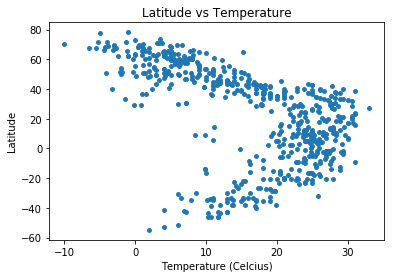

In [54]:
#plot scatter
citydf.plot.scatter(x='Max Temp',y='Lat',s=15)

plt.xlabel("Temperature (Celcius)")
plt.ylabel('Latitude')
plt.title('Latitude vs Temperature')
plt.savefig("images/lat_vs_temp.png", bbox_inches = 'tight')
plt.draw()
plt.show()

#### Latitude vs. Humidity Plot

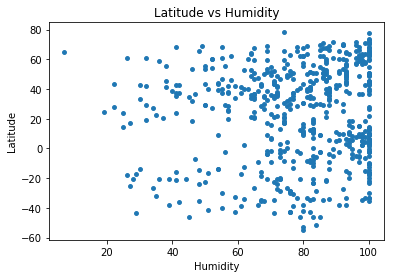

In [55]:
#plot scatter
citydf.plot.scatter(x='Humidity',y='Lat',s=15)

plt.xlabel("Humidity")
plt.ylabel('Latitude')
plt.title('Latitude vs Humidity')
plt.savefig("images/lat_vs_hum.png", bbox_inches = 'tight')
plt.draw()
plt.show()

#### Latitude vs. Cloudiness Plot

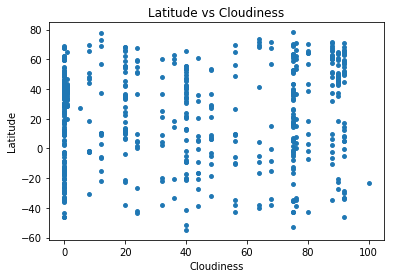

In [58]:
#plot scatter
citydf.plot.scatter(x='Cloudiness',y='Lat',s=15)

plt.xlabel("Cloudiness")
plt.ylabel('Latitude')
plt.title('Latitude vs Cloudiness')
plt.savefig("images/lat_vs_cloud.png", bbox_inches = 'tight')
plt.draw()
plt.show()

#### Latitude vs. Wind Speed Plot

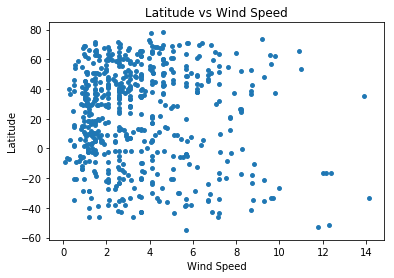

In [57]:
#plot scatter
citydf.plot.scatter(x='Wind Speed',y='Lat',s=15)

plt.xlabel("Wind Speed")
plt.ylabel('Latitude')
plt.title('Latitude vs Wind Speed')
plt.savefig("images/lat_vs_wind.png", bbox_inches = 'tight')
plt.draw()
plt.show()